# EA MAP572 - Projet Final

Ceci est un notebook joint au rapport, qui peut se lire totalement independemment.
Le but du notebook est juste de permettre de tester directement le code vu dans le rapport.

In [3]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy.random as rd
import seaborn as sbn

## Question 1.1

In [4]:
def Gr(n):
    if n==1:      # cas n=1
        return [[1]]   
    deg=[0,1]     # initialistion de la liste des degres
    A=np.zeros((n,n))
    A[0][0]=1     # connecter 1 avec 1
    for i in range(1,n):    # pour chaque element
        # on calcule la liste des probabilites cumules
        p=np.array(np.cumsum(deg))/np.sum(deg) 
        # on tire un nombre aléatoire
        s=rd.random() 
        # on regarde sa position j dans p
        j=-1            
        for k in range(len(p)-1): 
            if s>=p[k] and s<p[k+1]:
                j=k
        # on relie i avec j        
        A[i][j]=1    
        A[j][i]=1
        # on actualise deg
        deg[j+1]+=1     
        deg.append(1)
    # on retourne la matrice d'adjacence ainsi que les degrés
    return A,deg[1:]
print(Gr(5))
                
        
    
    

(array([[1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]]), [3, 3, 1, 1, 1])


## Question 1.2

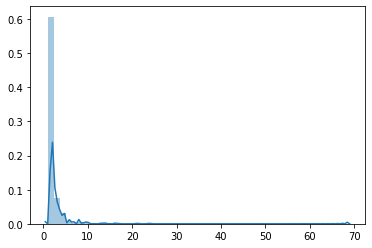

2.9353535529363803


Calculating best minimal value for power law fit
/Applications/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [5]:
def Degre_distribution(n,n_sim):
    L=np.zeros(n)
    for i in range(n_sim):  
        _,A=Gr(n)
        L+=np.array(A)/n_sim
    sbn.distplot(L)
    plt.show()
    return L

L=Degre_distribution(1000,10)
import powerlaw
results = powerlaw.Fit(L)
print(results.power_law.alpha)

## Question 2.1

In [6]:
def Graph(A,X,Y):
    n=len(A)
    plt.plot(X,Y,'ob')
    for i in range(n):
        for j in range(i,n):
            if A[i][j]==1:
                plt.plot((X[i],X[j]),(Y[i],Y[j]),'r')
    plt.show()

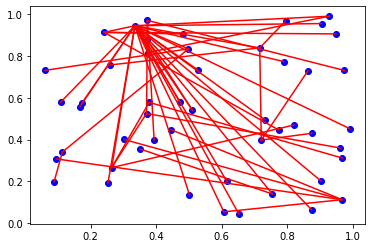

In [7]:
n=50
G=Gr(n)[0]
Graph(G,rd.random(n),rd.random(n))

# Question 2.2

In [8]:
# cette fonction retourne la matrice D_etoile defini ci-dessus
def distance_etoile(G):        #prend en parametre la matrice d'adjacence
    n=len(G)
    A=np.zeros((n,n))
    A[0][1],A[1][0]=1,1        #initialisation 
    for i in range(2,n):
        for j in range(i):
            if G[i][j]==1:     #pour chaque itération, on cherche l'element branché
                for k in range(i):
                    A[k][i],A[i][k]=A[k][j]+1,A[k][j]+1  #on actualise la distance
                break
    return A/np.max(A)

F,_= Gr(8)
print(F)
A=distance_etoile(F)
print(A,np.max(A))


[[1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
[[0.   0.25 0.25 0.25 0.25 0.25 0.5  0.5 ]
 [0.25 0.   0.5  0.5  0.5  0.5  0.75 0.75]
 [0.25 0.5  0.   0.5  0.5  0.5  0.75 0.25]
 [0.25 0.5  0.5  0.   0.5  0.5  0.25 0.75]
 [0.25 0.5  0.5  0.5  0.   0.5  0.75 0.75]
 [0.25 0.5  0.5  0.5  0.5  0.   0.75 0.75]
 [0.5  0.75 0.75 0.25 0.75 0.75 0.   1.  ]
 [0.5  0.75 0.25 0.75 0.75 0.75 1.   0.  ]] 1.0


In [9]:
#cette fonction retourne la distance entre Mi et Mj
def dist_sqr2(X,Y,i,j):
    return np.sqrt(((X[i]-X[j])**2+(Y[i]-Y[j])**2)/2)
def E(G,X,Y,D):
    n=len(G)
    S=0
    for i in range(n):
        for j in range(i):
            d=dist_sqr2(X,Y,i,j)
            S+=((d-D[i][j])**2)/(D[i][j])**2
    return S
#cette fonction retourne le gradient de E
def derive_E(G,X,Y,D):
    n=len(G)
    X_der=np.zeros(n)
    Y_der=np.zeros(n)
    for i in range(n):
        S,T=0,0
        for j in range(n):
            if j!=i:
                d=dist_sqr2(X,Y,i,j)
                S+=((d-D[i][j])*(X[i]-X[j]))/(d*(D[i][j])**2)
                T+=((d-D[i][j])*(Y[i]-Y[j]))/(d*(D[i][j])**2)
        X_der[i]=S
        Y_der[i]=T
    return X_der,Y_der
#cette fonction calcule la variation totale entre deux configurations des points Mi
def var(X,Y,M,N):
    return np.sum([np.sqrt((X[i]-M[i])**2+(Y[i]-N[i])**2)  for i in range(len(X))])

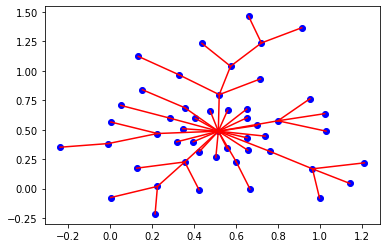

In [19]:
#epsilon représente la limite de convergence, et alpha le pas de la descente 
def Gradient_descent(G,epsilon,alpha):
    n=len(G)
    X=rd.random(n)
    Y=rd.random(n)
    D=distance_etoile(G)
    v=epsilon+1
    while(v>epsilon):
        X_der,Y_der=derive_E(G,X,Y,D)
        v=var(X,Y,X-alpha*X_der,Y-alpha*Y_der)
        X,Y=X-alpha*X_der,Y-alpha*Y_der
    return X,Y

X,Y=Gradient_descent(G,0.01,0.001)
Graph(G,X,Y)

## Question 2.3

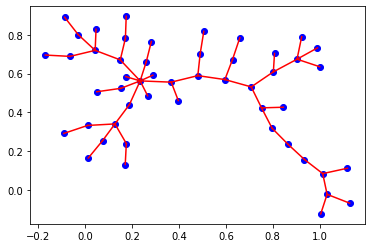

In [20]:
def Gr_delta(n,d):
    if n==1:
        return np.array([[1]])
    deg=[0,1+d]
    A=np.zeros((n,n))
    A[0][0]=1
    for i in range(1,n):
        p=np.array(np.cumsum((deg))/np.sum(deg))
        a=rd.random()
        j=-1
        for k in range(len(p)-1):
            if a >=p[k] and a <p[k+1]:
                j=k
        deg[j+1]+=1
        deg.append(1+d)
        A[i][j]=1
        A[j][i]=1
    return A,(np.array(deg)-d)[1:]
A,L=Gr_delta(50,1000000)
X2,Y2=Gradient_descent(A,0.01,0.001)
Graph(A,X2,Y2)
plt.show()


                

## Question 3.1

[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


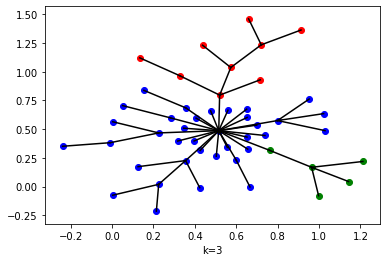

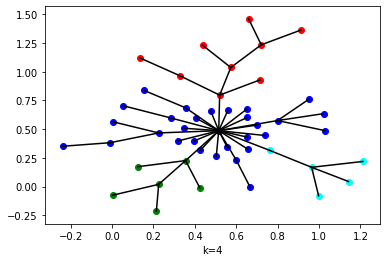

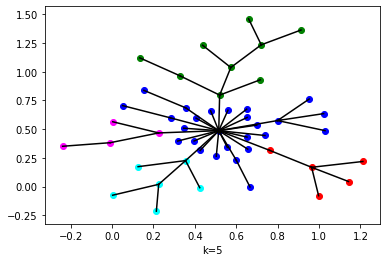

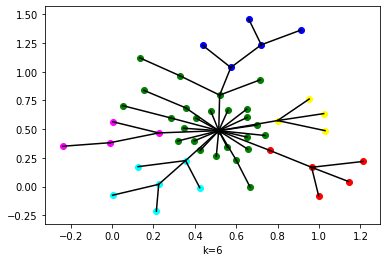

In [21]:
from sklearn.cluster import KMeans
colors=["blue","red","green","cyan" ,"magenta","yellow","black","white"]
def spectral_cluster(G,k):
    D = np.diag(G.sum(axis=1))
    L=D-G
    vals,vecs = np.linalg.eig(L)
    vecs = vecs[:,np.argsort(vals)].real
    vals = vals[np.argsort(vals)].real
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vecs[:,1:k])
    label = kmeans.labels_
    for i in range(len(G)):
            plt.scatter(X[i],Y[i],c=colors[label[i]])
    for i in range(len(G)):
        for j in range(i,len(G)):
            if G[i][j]==1:
                plt.plot((X[i],X[j]),(Y[i],Y[j]),'black')
    plt.xlabel("k={}".format(k))
    plt.show()
print(G)
for k in range(3,7):
    spectral_cluster(G,k)

## Question 3.3

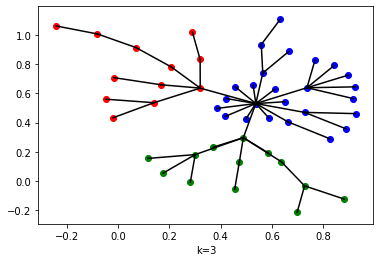

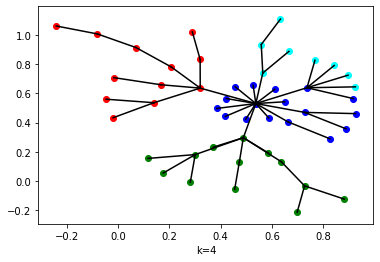

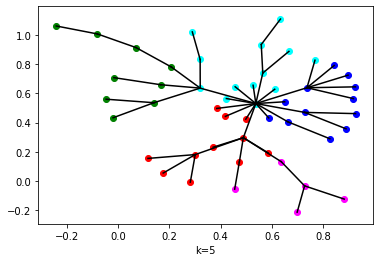

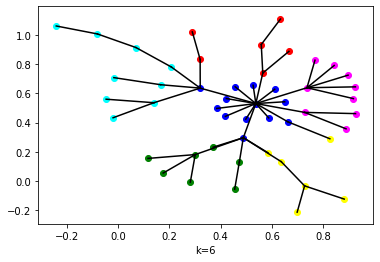

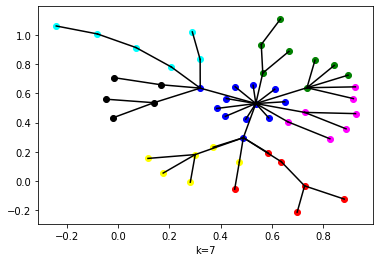

In [13]:
import numpy as np
A=np.c_[X,Y]
for k in range(3,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A)
    label = kmeans.labels_
    #wcss.append(kmeans.inertia_)
    for i in range(len(G)):
        plt.scatter(X[i],Y[i],c=colors[label[i]])
    for i in range(len(G)):
        for j in range(i,len(G)):
            if G[i][j]==1:
                 plt.plot((X[i],X[j]),(Y[i],Y[j]),'black')
    plt.xlabel("k={}".format(k))
    plt.show()

## Question 3.2

In [14]:
MatriceAdjacence=np.loadtxt('StochasticBlockModel.txt')
D2 = np.diag(MatriceAdjacence.sum(axis=1))
L2=D2-MatriceAdjacence
vals2,vecs2 = np.linalg.eig(L2)
vecs2 = vecs2[:,np.argsort(vals2)]
vals2 = vals2[np.argsort(vals2)]
kmeans_ADJ = KMeans(n_clusters=4)
kmeans_ADJ.fit(vecs2[:,1:4])
label_ADJ = kmeans_ADJ.labels_
print(label_ADJ)
X=label_ADJ
A,B,C,D=0,0,0,0
for i in range(len(label_ADJ)):
    if X[i]==0:
        A+=1
    elif X[i]==1:
        B+=1
    elif X[i]==2:
        C+=1
    else:
        D+=1
print(A,B,C,D)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
from graspy.simulations import sbm
K=2
n_SBM = [50, 50]
P_SBM = [[0.8, 0.2],
         [0.2, 0.5]]
G_SBM = sbm(n=n_SBM, p=P_SBM)
D_SBM = np.diag(G_SBM.sum(axis=1))
L_SBM=D_SBM-G_SBM
vals_SBM,vecs_SBM = np.linalg.eig(L_SBM)
vecs_SBM = vecs_SBM[:,np.argsort(vals_SBM)]
vals_SBM = vals_SBM[np.argsort(vals_SBM)]
kmeans_SBM = KMeans(n_clusters=K)
kmeans_SBM.fit(vecs_SBM[:,1:K])
label_SBM = kmeans_SBM.labels_
print(label_SBM)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Question 4.1

In [16]:
from scipy.linalg import eig
import networkx as nx
def P(e,G):
    return (1-e)*(G/np.sum(G,axis=1)) + e*np.ones((len(G),len(G)))/(len(G)) 
F,_=Gr(10)
def pagerank(e,G):
    n=len(G)
    S=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            S[i][j]=G[i][j]
    Pe=P(e,S)
    values, vecs = eig(Pe, right = False, left = True)
    vecs = vecs[:,np.argsort(values)]
    values = values[np.argsort(values)]
    for i in range(n):
        if round(values[i].real,2)==1.00 :
            return vecs[:,i].real/np.sum(vecs[:,i].real)
    return np.zeros(n)
pagerank(0.15,F)


    


array([0.85225, 0.015  , 0.015  , 0.015  , 0.02775, 0.015  , 0.015  ,
       0.015  , 0.015  , 0.015  ])

## Question 4.3

In [17]:
def tricher(e,G):
    n=len(G)
    S=np.zeros((n+3,n+3))
    for i in range(n):
        for j in range(n):
            S[i][j]=G[i][j]
    S[n][0],S[n+1][0],S[n+2][0]=1,1,1
    return pagerank(e,S)[0]-pagerank(e,G)[0]
tricher(0.15,F)

-0.0005192307692303277

In [6]:
w=np.array([1,-1,3,-5])
np.sign(w[1])

-1

In [3]:
A=np.array([[1,2],[3,4]])
np.sum(A,axis=1)

array([3, 7])

In [5]:

A=np.array([1,2,-3])
print(np.linalg.norm(A,1))

6.0
